In [62]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read in data
traffic_collisions_details=pd.read_csv("https://seshat.datasd.org/pd/pd_collisions_details_datasd.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#read in dictionary

traffic_collisions_dictionary = pd.read_csv("https://seshat.datasd.org/pd/pd_collisions_details_dictionary_datasd.csv")

In [5]:
person_veh_dictionary = pd.read_csv("https://seshat.datasd.org/pd/person_veh_type_dictionary_datasd.csv")

In [22]:
traffic_collisions_details.head()

,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,600096,2015-01-01 15:19:00,DRIVER,NaN,NaN,NaN,FORD,NaN,112,3600,...,BOULEVARD,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,NaN
1,600096,2015-01-01 15:19:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,FORD,MUSTANG,112,3600,...,BOULEVARD,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,NaN
2,600068,2015-01-02 13:04:00,DRIVER,VISABLE,NaN,MOTORCYCLE,KAWASAKI,NaN,437,2800,...,STREET,,,,21801A,VC,LEFT TURN YIELD UNTIL SAFE OR U-TURN,1,0,MISDEMEANOR
3,600051,2015-01-02 20:15:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,TOYOTA,MATRIX (SPORT WAGON),833,3800,...,AVENUE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
4,503396,2015-01-13 13:51:00,DRIVER,NaN,NaN,LIGHT DUTY TRUCK,GENERAL MOTORS CORP,NaN,724,2200,...,AVENUE,,,,21950A,VC,YIELD RIGHT OF WAY TO PEDESTRIANS,1,0,NaN


In [16]:
traffic_collisions_dictionary.head()

,field,description,possible_values
0,report_id,Collision report number,NaN
1,date_time,Date/time of collision,NaN
2,person_role,Description of person's role in the collision,"BICYCLIST, DRIVER, OTHER, PARKED VEHICLE OCCUP..."
3,person_injury_lvl,Description of person's level of injury,"FATAL, NULL, PAIN, SEVERE, VISABLE"
4,person_veh_type,Description of type of vehicle (categories def...,see list linked at https://data.sandiego.gov/d...


In [23]:
person_veh_dictionary.head()

,possible_values
0,"Passenger Car, Station Wagon, Jeep"
1,Motorcycle
2,Motor Driven Cycle/Scooter
3,Bicycle
4,Motorized Bicycle


Lets see what values are present in select columns

In [6]:
#types of person_role
print(traffic_collisions_details['person_role'].value_counts())

DRIVER                     74870
PARKED VEHICLE OCCUPANT    26322
PASSENGER                   6654
BICYCLIST                   2158
OTHER                        312
Name: person_role, dtype: int64


In [7]:
#types of violation section 
print(traffic_collisions_details['violation_section'].value_counts())

22107       28382
MISC-HAZ    18552
22350       15720
21453A       7741
22106        6915
            ...  
22456           1
21456A          1
21200B          1
38320A          1
22500G          1
Name: violation_section, Length: 293, dtype: int64


In [9]:
#location of collision 

print(traffic_collisions_details['address_road_primary'].value_counts())

UNIVERSITY            2794
EL CAJON              2777
CLAIREMONT MESA       1507
BALBOA                1463
IMPERIAL              1449
                      ... 
WALLABY                  1
LA SALLE                 1
PASEO DE LA FUENTE       1
ANDREW                   1
AGUA VISTA               1
Name: address_road_primary, Length: 4851, dtype: int64


In [10]:
#dates
print(traffic_collisions_details['date_time'].value_counts())

2018-09-14 15:55:00    16
2021-07-09 23:20:00    15
2019-03-13 14:55:00    15
2020-06-21 18:20:05    14
2019-09-22 14:54:47    13
                       ..
2020-11-15 01:30:00     1
2015-06-01 17:15:00     1
2020-07-05 13:38:00     1
2016-12-08 17:45:00     1
2019-09-17 19:01:00     1
Name: date_time, Length: 64103, dtype: int64


In [12]:
#date range
print(traffic_collisions_details['date_time'].min())
print(traffic_collisions_details['date_time'].max())

2015-01-01 00:01:00
2021-10-26 02:06:00


In [9]:
#violation section types
print(traffic_collisions_details['violation_type'].value_counts())

VC    114087
MC        55
ZZ        23
CO        12
PC         9
HS         3
HN         2
Name: violation_type, dtype: int64


In [11]:
#police beat
print(traffic_collisions_details['police_beat'].value_counts())

122    4337
813    2463
242    2407
313    2338
521    2008
       ... 
500       1
404       1
221       1
601       1
904       1
Name: police_beat, Length: 288, dtype: int64


In [13]:
#hit_run column
print(traffic_collisions_details['hit_run_lvl'].value_counts())

MISDEMEANOR    44649
FELONY           694
Name: hit_run_lvl, dtype: int64


In [14]:
#charge description--violation section description for primary collision factor
print(traffic_collisions_details['charge_desc'].value_counts())

TURNING MOVEMENTS AND REQUIRED SIGNALS                       18650
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHICLE CODE       18549
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)                   9714
VIOLATION OF BASIC SPEED LAW, SPEED UNSAFE FOR CONDITIONS     9670
UNSAFE SPEED (BASIC SPEED LAW) (I)                            6044
                                                             ...  
CARRYING WHITE CANE BY OTHER THAN BLIND PERSON                   1
VEHICLE ON HWY STOLEN/EMBEZZLED                                  1
DRIVER ARRESTED                                                  1
STOPPING DISTANCE REQUIREMENTS                                   1
OFF HWY VEH:LITTERING FROM VEH (M)                               1
Name: charge_desc, Length: 427, dtype: int64


In [15]:
#look at describe?
traffic_collisions_details.describe()
    #not helpful because three columns are numeric type

,address_no_primary,injured,killed
count,1.141910e+05,114191.000000,114191.000000
mean,4.952233e+03,0.728963,0.005570
std,8.898607e+04,1.182429,0.083306
min,0.000000e+00,0.000000,0.000000
25%,1.500000e+03,0.000000,0.000000
50%,3.600000e+03,1.000000,0.000000
75%,5.500000e+03,1.000000,0.000000
max,1.228202e+07,180.000000,4.000000


In [19]:
traffic_collisions_details.shape[1]

22

Lets clean up these data

In [29]:
#get datatype for each column
traffic_collisions_details.dtypes

report_id                    object
date_time                    object
person_role                  object
person_injury_lvl            object
person_veh_type              object
veh_type                     object
veh_make                     object
veh_model                    object
police_beat                  object
address_no_primary            int64
address_pd_primary           object
address_road_primary         object
address_sfx_primary          object
address_pd_intersecting      object
address_name_intersecting    object
address_sfx_intersecting     object
violation_section            object
violation_type               object
charge_desc                  object
injured                       int64
killed                        int64
hit_run_lvl                  object
dtype: object

In [6]:
#check for missing data

traffic_collisions_details.head()

,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,600096,2015-01-01 15:19:00,DRIVER,NaN,NaN,NaN,FORD,NaN,112,3600,...,BOULEVARD,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,NaN
1,600096,2015-01-01 15:19:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,FORD,MUSTANG,112,3600,...,BOULEVARD,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,NaN
2,600068,2015-01-02 13:04:00,DRIVER,VISABLE,NaN,MOTORCYCLE,KAWASAKI,NaN,437,2800,...,STREET,,,,21801A,VC,LEFT TURN YIELD UNTIL SAFE OR U-TURN,1,0,MISDEMEANOR
3,600051,2015-01-02 20:15:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,TOYOTA,MATRIX (SPORT WAGON),833,3800,...,AVENUE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
4,600441,2015-01-13 13:59:00,BICYCLIST,PAIN,NaN,BICYCLE,NaN,NaN,611,3500,...,DRIVE,,,,82.22,MC,STOP UPON EMERGING FROM ALLEY/PRIVATE DRIVEWAY,1,0,NaN


In [10]:
#check empty columns

print(traffic_collisions_details['address_pd_intersecting'].unique()) #empty strings
print(traffic_collisions_details['address_name_intersecting'].unique())
print(traffic_collisions_details['address_sfx_intersecting'].unique())

[' ' 'W' 'E' 'N' 'S' 'SE']
[' ' 'I-15 SB' 'UNIVERSITY' ... 'Wahington'
 'East curbline of 3800 Seventh' 'MONTETUMA']
[' ' 'AVENUE' 'BOULEVARD' 'ROAD' 'STREET' 'DRIVEWAY' 'DRIVE' 'WAY' 'LANE'
 'PARKWAY' 'RAMP' 'HIGHWAY' 'PLACE' 'TERRACE' 'COURT' 'ROW' 'POINT' 'WALK'
 'CIRCLE' 'SQUARE' nan 'FREEWAY' 'TRAIL' 'PLAZA' 'ALLEY' 'BRIDGE'
 'ST RAMP' 'LOOP' 'MALL']


In [11]:
#replace empty strings with null values
traffic_collisions_details_edited = traffic_collisions_details.replace(r'^\s+$', np.nan, regex=True)

In [12]:
traffic_collisions_details_edited.head()

,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,600096,2015-01-01 15:19:00,DRIVER,NaN,NaN,NaN,FORD,NaN,112,3600,...,BOULEVARD,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,NaN
1,600096,2015-01-01 15:19:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,FORD,MUSTANG,112,3600,...,BOULEVARD,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,NaN
2,600068,2015-01-02 13:04:00,DRIVER,VISABLE,NaN,MOTORCYCLE,KAWASAKI,NaN,437,2800,...,STREET,NaN,NaN,NaN,21801A,VC,LEFT TURN YIELD UNTIL SAFE OR U-TURN,1,0,MISDEMEANOR
3,600051,2015-01-02 20:15:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,TOYOTA,MATRIX (SPORT WAGON),833,3800,...,AVENUE,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
4,600441,2015-01-13 13:59:00,BICYCLIST,PAIN,NaN,BICYCLE,NaN,NaN,611,3500,...,DRIVE,NaN,NaN,NaN,82.22,MC,STOP UPON EMERGING FROM ALLEY/PRIVATE DRIVEWAY,1,0,NaN


Now lets check the report ID. Does the report ID uniquely identify an collision? 

In [15]:
#check if report_id is unique 

print(traffic_collisions_details_edited['report_id'].nunique())
print(len(traffic_collisions_details_edited))
    #repeated report_id, one row per person involved in collision

67978
118310


In [18]:
#lets see how many involve multiple people

multiple_people = traffic_collisions_details_edited[traffic_collisions_details_edited.duplicated('report_id', keep = False)]
multiple_people

,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,600096,2015-01-01 15:19:00,DRIVER,NaN,NaN,NaN,FORD,NaN,112,3600,...,BOULEVARD,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,NaN
1,600096,2015-01-01 15:19:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,FORD,MUSTANG,112,3600,...,BOULEVARD,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,NaN
4,600441,2015-01-13 13:59:00,BICYCLIST,PAIN,NaN,BICYCLE,NaN,NaN,611,3500,...,DRIVE,NaN,NaN,NaN,82.22,MC,STOP UPON EMERGING FROM ALLEY/PRIVATE DRIVEWAY,1,0,NaN
5,600441,2015-01-13 13:59:00,DRIVER,NaN,NaN,NaN,FORD,ESCORT,611,3500,...,DRIVE,NaN,NaN,NaN,82.22,MC,STOP UPON EMERGING FROM ALLEY/PRIVATE DRIVEWAY,1,0,NaN
8,503789,2015-03-03 10:30:00,DRIVER,PAIN,NaN,NaN,CHEVROLET,SILVERADO,315,0,...,ROAD,NaN,I-15 SB,NaN,21658A,VC,LANED ROADWAYS - STRADDLING OR UNSAFE CHANGING,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114598,22202631,2022-05-02 18:31:14,PASSENGER,NaN,"Passenger Car, Station Wagon, Jeep",AUTOMOBILE,HONDA,ACCORD,524,1100,...,AVENUE,NaN,NaN,NaN,21802B,VC,RIGHT-OF-WAY: ENTERING OR CROSSING INTERSECTIO...,1,0,NaN
114599,22202631,2022-05-02 18:31:14,DRIVER,NaN,"Passenger Car, Station Wagon, Jeep",AUTOMOBILE,HONDA,ACCORD,524,1100,...,AVENUE,NaN,NaN,NaN,21802B,VC,RIGHT-OF-WAY: ENTERING OR CROSSING INTERSECTIO...,1,0,NaN
114600,22202631,2022-05-02 18:31:14,DRIVER,VISABLE,NaN,NaN,NaN,NaN,524,1100,...,AVENUE,NaN,NaN,NaN,21802B,VC,RIGHT-OF-WAY: ENTERING OR CROSSING INTERSECTIO...,1,0,NaN
114601,22202635,2022-05-02 22:10:00,DRIVER,NaN,NaN,NaN,B.M.W.,NaN,313,8700,...,DRIVE,NaN,NaN,NaN,21703,VC,FOLLOWING TOO CLOSELY (I),1,0,MISDEMEANOR


In [19]:
print(multiple_people['report_id'].nunique()) #number of accidents that involve multiple people

34620


In [53]:
#check if person_role has any nan
print(traffic_collisions_details_edited['person_role'].isnull().sum())#lets not group by this
print(traffic_collisions_details_edited['violation_section'].isnull().sum())

3707
0


In [52]:
# count how many missing values in each column for whole dataframe
traffic_collisions_details_edited.isnull().sum()

report_id                         0
date_time                         0
person_role                    3707
person_injury_lvl             89782
person_veh_type               79607
veh_type                      63891
veh_make                      11999
veh_model                     35861
police_beat                       0
address_no_primary                0
address_pd_primary           113116
address_road_primary              1
address_sfx_primary            7070
address_pd_intersecting      118012
address_name_intersecting    109964
address_sfx_intersecting     110835
violation_section                 0
violation_type                    0
charge_desc                       0
injured                           0
killed                            0
hit_run_lvl                   70678
dtype: int64

In [66]:
#groupby accident to see how many people involved per accident

n_accident = traffic_collisions_details_edited.groupby('report_id')['violation_section'].count()
print(n_accident)
print(n_accident.max())#max number of people are 15



report_id
193479    1
193481    1
193482    1
193483    1
193484    1
         ..
S00002    1
T00000    1
U00000    1
V00001    1
V00003    1
Name: violation_section, Length: 67978, dtype: int64
15


Text(0.5, 0, 'Individuals Involved')

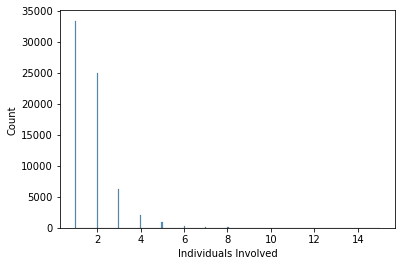

In [67]:
#graph number of people per accident 

n_accident = n_accident.reset_index()
n_accident

Text(0.5, 0, 'Individuals Involved')

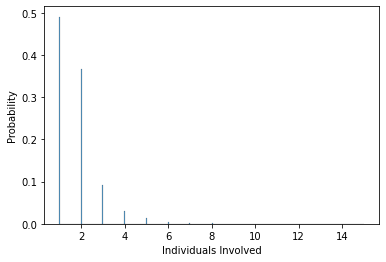

In [103]:
people_graph = sns.histplot(data = n_accident, x = 'violation_section', stat='probability')
people_graph.set_xlabel("Individuals Involved") #most accidents involved 1 person

In [72]:
#how does an accident involve 1 person
n_accident

one_person = n_accident[n_accident['violation_section']==1] #violation section is what was grouped on
one_person

one_person_details = pd.merge(traffic_collisions_details_edited, one_person, on='report_id')
one_person_details

,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section_x,violation_type,charge_desc,injured,killed,hit_run_lvl,violation_section_y
0,600068,2015-01-02 13:04:00,DRIVER,VISABLE,NaN,MOTORCYCLE,KAWASAKI,NaN,437,2800,...,NaN,NaN,NaN,21801A,VC,LEFT TURN YIELD UNTIL SAFE OR U-TURN,1,0,MISDEMEANOR,1
1,600051,2015-01-02 20:15:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,TOYOTA,MATRIX (SPORT WAGON),833,3800,...,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR,1
2,171111,2015-01-14 20:00:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,TOYOTA,RAV4,835,4200,...,NaN,NaN,NaN,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,1
3,506184,2015-02-19 23:30:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,B.M.W.,328IS,618,1100,...,NaN,NaN,NaN,22106,VC,STARTING PARKED VEHICLES OR BACKING,0,0,MISDEMEANOR,1
4,506537,2015-03-08 20:00:00,PARKED VEHICLE OCCUPANT,NaN,NaN,LIGHT DUTY TRUCK,TOYOTA,TACOMA,323,5300,...,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,22017445,2022-04-19 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,813,1800,...,NaN,NaN,NaN,20002(B),VC,HIT AND RUN:RUNAWAY VEH:PROP DAMAGE (M),0,0,MISDEMEANOR,1
33354,22202404,2022-04-20 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,623,7000,...,NaN,NaN,NaN,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,1
33355,22202489,2022-04-23 00:19:00,NaN,NaN,NaN,NaN,NaN,NaN,326,0,...,NaN,MONTETUMA,ROAD,21456B,VC,PEDESTRIAN CROSS AGAINST NO WALK SIGN/SIGNAL (I),1,0,MISDEMEANOR,1
33356,22202461,2022-04-23 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,124,6200,...,NaN,NaN,NaN,22107,VC,TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),1,0,NaN,1


In [73]:
#check violation section for one person accidents

traffic_collisions_dictionary

,field,description,possible_values
0,report_id,Collision report number,NaN
1,date_time,Date/time of collision,NaN
2,person_role,Description of person's role in the collision,"BICYCLIST, DRIVER, OTHER, PARKED VEHICLE OCCUP..."
3,person_injury_lvl,Description of person's level of injury,"FATAL, NULL, PAIN, SEVERE, VISABLE"
4,person_veh_type,Description of type of vehicle (categories def...,see list linked at https://data.sandiego.gov/d...
5,veh_type,Description of type of vehicle **,"AUTOMOBILE, BICYCLE, FARM EQUIPMENT, LIGHT DUT..."
6,veh_make,Make of the vehicle,NaN
7,veh_model,Model of the vehicle,NaN
8,police_beat,San Diego Police beat,see list linked at https://data.sandiego.gov/d...
9,address_no_primary,"Street number of collision location, abstracte...",NaN


In [83]:
#seems like alot of one person accidents are potentially hit/run, lets see those that arent

one_person_details[one_person_details.hit_run_lvl.isnull()]

#question- are all of these collisions-or also tickets?- collisions only presemt

    #1 row per person involved
    #some of these have multiple people listed as injured--mistake or what?
    
one_person_details[ one_person_details.injured >5] #can there be more injured than possible in a vehicle?



,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section_x,violation_type,charge_desc,injured,killed,hit_run_lvl,violation_section_y
4219,600644,2016-01-24 03:14:00,DRIVER,NaN,NaN,LIGHT DUTY TRUCK,DODGE,NaN,444,3900,...,NaN,NaN,NaN,21804,VC,ENTERING HWY FROM PRIVATE ROAD OR DRIVEWAY,8,0,FELONY,1
5928,604438,2016-05-13 14:14:00,DRIVER,NaN,NaN,NaN,HONDA,CIVIC (AND CRX),933,13500,...,NaN,NaN,NaN,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,8,0,NaN,1
5992,604424,2016-05-16 12:41:00,DRIVER,PAIN,NaN,NaN,DODGE,DURANGO,837,3900,...,NaN,NaN,NaN,22350,VC,"VIOLATION OF BASIC SPEED LAW, SPEED UNSAFE FOR...",6,0,MISDEMEANOR,1
18168,187004,2018-08-31 13:15:00,DRIVER,VISABLE,NaN,NaN,GENERAL MOTORS CORP,ACADIA,441,900,...,NaN,NaN,NaN,22450,VC,STOP REQUIREMENTS,7,0,FELONY,1
27097,21201529,2021-03-15 09:05:00,DRIVER,NaN,"Passenger Car, Station Wagon, Jeep",AUTOMOBILE,VOLVO,240 SERIES,521,1400,...,NaN,NaN,NaN,23153(F),VC,DUI DRUG:CAUSING BODILY INJURY (F),7,3,NaN,1
31452,180304,2017-12-15 20:22:00,NaN,NaN,NaN,NaN,NaN,NaN,441,0,...,NaN,MILBRAE,STREET,21950A,VC,YIELD RIGHT OF WAY TO PEDESTRIANS,180,0,NaN,1


Appears that since a collision can just appear in the data once (one individual/vehicle involved) but injury >1 person that the collisions are reported are the individuals/vehicles at fault. Evidence that supports this is that the violation section is never null. 

In [86]:
pd.set_option('max_columns', None)
print(one_person_details[one_person_details.report_id == '600644'])

     report_id           date_time person_role person_injury_lvl  \
4219    600644 2016-01-24 03:14:00      DRIVER               NaN   

     person_veh_type          veh_type veh_make veh_model police_beat  \
4219             NaN  LIGHT DUTY TRUCK    DODGE       NaN         444   

      address_no_primary address_pd_primary address_road_primary  \
4219                3900                NaN               MARKET   

     address_sfx_primary address_pd_intersecting address_name_intersecting  \
4219              STREET                     NaN                       NaN   

     address_sfx_intersecting violation_section_x violation_type  \
4219                      NaN               21804             VC   

                                     charge_desc  injured  killed hit_run_lvl  \
4219  ENTERING HWY FROM PRIVATE ROAD OR DRIVEWAY        8       0      FELONY   

      violation_section_y  
4219                    1  


Lets check out injured

In [89]:
#check numeric columns for maximums and outliers 

traffic_collisions_details_edited[['date_time','injured','killed']].agg(['min','max','mean'])

,date_time,injured,killed
min,2015-01-01 15:19:00.000000000,0.00000,0.000000
max,2022-05-02 22:10:00.000000000,180.00000,4.000000
mean,2018-12-11 09:20:47.053529088,0.73053,0.005697


In [91]:
#seems like outlier in max injured..very unlikely 

outliers = traffic_collisions_details_edited[traffic_collisions_details_edited['injured']>10]
outliers

,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
47296,184523,2018-06-12 14:22:00,DRIVER,NaN,NaN,NaN,LEXUS,NaN,931,6300,NaN,MIRAMAR,ROAD,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,122,0,NaN
47297,184523,2018-06-12 14:22:00,DRIVER,PAIN,NaN,NaN,ACURA,TL,931,6300,NaN,MIRAMAR,ROAD,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,122,0,NaN
116404,180304,2017-12-15 20:22:00,NaN,NaN,NaN,NaN,NaN,NaN,441,0,NaN,OCEAN VIEW,BOULEVARD,NaN,MILBRAE,STREET,21950A,VC,YIELD RIGHT OF WAY TO PEDESTRIANS,180,0,NaN


In [92]:
print(len(traffic_collisions_details_edited))

118310


In [93]:
#get rid of outliers

#since unique index

traffic_collisions_details_edited.drop(outliers.index, axis=0, inplace=True)

In [94]:
print(len(traffic_collisions_details_edited))

118307


<AxesSubplot:xlabel='injured', ylabel='Probability'>

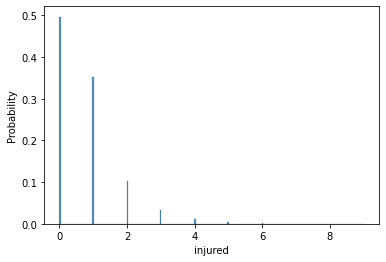

In [102]:
sns.histplot(data = traffic_collisions_details_edited, x ='injured', stat = 'probability')

<AxesSubplot:xlabel='killed', ylabel='Probability'>

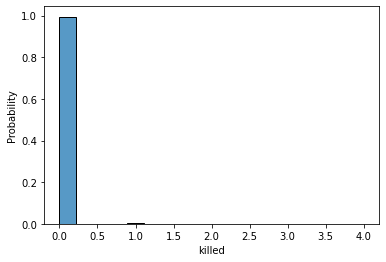

In [101]:
sns.histplot(data = traffic_collisions_details_edited, x = 'killed', stat='probability')

Now lets see vehicle type

In [23]:
#person_veh_type versus #veh_type

print(traffic_collisions_details_edited['person_veh_type'].unique())

print(traffic_collisions_details_edited['veh_type'].unique())

[nan 'Passenger Car, Station Wagon, Jeep' 'Paratransit' 'Pickups & Panels'
 'Unknown Hit and Run Vehicle' 'Three or More Axle Truck' 'Ambulance'
 'Police Car' 'Sport Utility Vehicle' 'Mini-vans' 'Other Commercial'
 'All Terrain Vehicle' 'Two Axle Truck' 'Public Transit Authority'
 'Motor Driven Cycle/Scooter' 'Motorcycle' 'Fire Truck'
 'Emergency Vehicle (On Emg Run)' 'Two Axle Tank Truck' 'Pickup w/Camper'
 'Low Speed Vehicle' 'Tour Bus' 'Truck Tractor' 'Non-Commercial Bus'
 'Passengers' 'Utility' 'Misc Mtr Veh (Snowmbl,Glf Crt)'
 'Go-ped, ZIP Elec sctr, Motobrd' 'Semi' 'Three Axle Tank Truck'
 'Mobile Equipment' 'Bicycle' 'Motor Home'
 'Two Trailers (includes Semi & Pull)'
 'Federally Legal Double Combo Over 75 Feet' 'Two-Axle Tow Truck'
 'HazWst Three or More Axle Trk' 'School Bus Public Type I'
 'School Bus Private Type I' 'General Public Paratransit Vehicle'
 'Semi Tank Trailer' 'School Bus Public Type II' 'Motorized Bicycle'
 'Pull' 'Boat' 'Misc Non-Motor Vehicle' 'Federally Lega

In [24]:
#change datetime to actual datetime data type to do time series analysis 

traffic_collisions_details_edited['date_time'] = pd.to_datetime(traffic_collisions_details_edited['date_time'])

In [30]:
print(traffic_collisions_details_edited['date_time'].iloc[0].date())

2015-01-01


In [36]:
#make year, month, day column separate 
print(traffic_collisions_details_edited['date_time'].iloc[0].hour)

15


Now lets see what violation sections are most prominent- what is mostly causing these collisions

In [104]:
#violation section

print(traffic_collisions_details_edited['violation_section'].unique())

['22107' '21801A' '82.22' 'MISC-HAZ' '22106' '21658A' '21651B' '21950B'
 '22350' '21950A' '21460A' '21703' '21453A' '20002(A)' '21804' '21651A'
 '21954A' '22100A' '21954(B)' '21802A' '21453B' '21456B' '22102' '21754'
 '22515A' '21955' '22101D' '23123(A)' '21453C' '22517' '21203' '22450(A)'
 '21700' '21657' '21461.5' '21205' '21800A' '21663' '22453' '23152A'
 '21952' 'UNKNOWN' '22105' '21461A' '22100B' '84.09' '22109' '21750'
 '21801B' '21650' '21460.5C' '21451A' '21956' 'MISC' '21650.1' '21463'
 '21705' '21755' '23103' '20002(B)' '21800C' '84.12' '21803A' '22349'
 '22515B' '21717' '21202A' '21806A' '21800B' '24250' '21208A' '21457A'
 '21753' '21803B' '21800(D)1' '21453D' '21760(C)' '22400A' '24002' '22108'
 '12500(A)' '23114(A)' '23109(C)' '22103' '21651(A)(2)' '21800E' '26451A'
 '22450' '21702A' '23104' '21651(A)1' '21209A' '84.09A' '981154' '21711'
 '20002(A)(1)' '26450' '20002(A)(2)' '2800.2(A)' '24400' '22500E' '21957'
 '27315E' '21201A' '22352' '23153' '21651(C)' '21701' '21200.5'

In [105]:
#charge description

print(traffic_collisions_details_edited['charge_desc'].unique()) #these repeat 

['TURNING MOVEMENTS AND REQUIRED SIGNALS'
 'LEFT TURN YIELD UNTIL SAFE OR U-TURN'
 'STOP UPON EMERGING FROM ALLEY/PRIVATE DRIVEWAY'
 'MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHICLE CODE'
 'STARTING PARKED VEHICLES OR BACKING'
 'LANED ROADWAYS - STRADDLING OR UNSAFE CHANGING'
 'DRIVE THE WRONG WAY ON A DIVIDED HIGHWAY'
 'PEDESTRIAN NOT TO SUDDENLY ENTER PATH, ETC'
 'VIOLATION OF BASIC SPEED LAW, SPEED UNSAFE FOR CONDITIONS'
 'YIELD RIGHT OF WAY TO PEDESTRIANS'
 'DRIVING TO LEFT OF DOUBLE SOLID LINES' 'FOLLOWING TOO CLOSELY'
 'RED OR STOP,VEHICLES STOP AT LIMIT LINE' 'HIT AND RUN'
 'ENTERING HWY FROM PRIVATE ROAD OR DRIVEWAY'
 'DIVIDED HIGHWAYS DRIVING TO LEFT OF DIVIDING SECTION OR U-TURN'
 'PEDESTRIANS OUTSIDE CROSSWALKS' 'RIGHT TURNS AT INTERSECTIONS'
 'DRIVER CARE ON ROADWAY'
 'ENTRANCE FROM STOP THROUGH HIGHWAY,YIELD UNTIL REASONABLY SAFE'
 'AFTER STOPPING YIELD TO PEDESTRIANS' "PEDESTRIAN TRAFFIC, 'WAIT' SIGN"
 'U-TURN IN BUSINESS DISTRICT' 'PASSING ON RIGHT,WHEN UNLAWFUL'
 'LEA

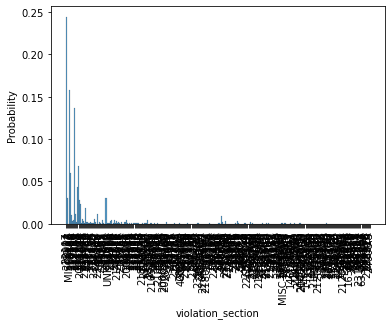

In [109]:
#graph violation section

#plt.figure(figsize(15,8))

ax = sns.histplot(data = traffic_collisions_details_edited, x = 'violation_section', stat='probability')
ax.tick_params(axis='x', rotation=90)


In [111]:
#groupby and only get top 10 violation sections 

n_violation_section = traffic_collisions_details_edited.groupby('violation_section')['report_id'].nunique()
n_violation_section

violation_section
10851              2
10851(A)          12
11350(A)           2
12500              1
12500(A)         186
               ...  
GANGS              1
MISC              10
MISC-HAZ       14090
MISC-NONHAZ        1
UNKNOWN           27
Name: report_id, Length: 299, dtype: int64

In [117]:
df_n_violation = pd.DataFrame({'section':n_violation_section.index,'unique_counts':n_violation_section.values})

In [120]:
df_n_violation = df_n_violation.sort_values(by='unique_counts', ascending=False)

In [121]:
df_n_violation

,section,unique_counts
163,22107,16957
296,MISC-HAZ,14090
172,22350,8451
162,22106,4580
59,21453A,3563
...,...,...
53,21253,1
54,21367(A),1
192,22502A,1
238,23152D,1


In [123]:
#add percentage column

df_n_violation['percentage'] = df_n_violation.unique_counts/df_n_violation.unique_counts.sum()
df_n_violation

,section,unique_counts,percentage
163,22107,16957,0.249456
296,MISC-HAZ,14090,0.207279
172,22350,8451,0.124323
162,22106,4580,0.067377
59,21453A,3563,0.052416
...,...,...,...
53,21253,1,0.000015
54,21367(A),1,0.000015
192,22502A,1,0.000015
238,23152D,1,0.000015


In [124]:
#subset to get top 10

top_10_violation = df_n_violation.head(10)
top_10_violation

,section,unique_counts,percentage
163,22107,16957,0.249456
296,MISC-HAZ,14090,0.207279
172,22350,8451,0.124323
162,22106,4580,0.067377
59,21453A,3563,0.052416
102,21703,2398,0.035277
17,20002(A),1787,0.026289
130,21801A,1690,0.024862
235,23152A,1477,0.021728
136,21804,1280,0.018830


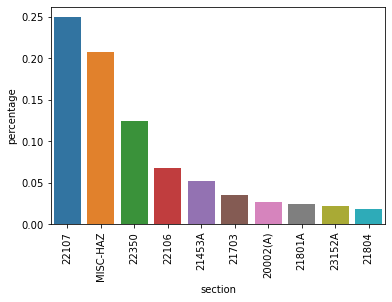

In [126]:
ax = sns.barplot(data = top_10_violation, x = 'section', y = 'percentage')
ax.tick_params(axis='x', rotation=90)

In [127]:
traffic_collisions_details_edited.head()

,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,600096,2015-01-01 15:19:00,DRIVER,NaN,NaN,NaN,FORD,NaN,112,3600,NaN,MT EVEREST,BOULEVARD,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,NaN
1,600096,2015-01-01 15:19:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,FORD,MUSTANG,112,3600,NaN,MT EVEREST,BOULEVARD,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,NaN
2,600068,2015-01-02 13:04:00,DRIVER,VISABLE,NaN,MOTORCYCLE,KAWASAKI,NaN,437,2800,S,WOODMAN,STREET,NaN,NaN,NaN,21801A,VC,LEFT TURN YIELD UNTIL SAFE OR U-TURN,1,0,MISDEMEANOR
3,600051,2015-01-02 20:15:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,TOYOTA,MATRIX (SPORT WAGON),833,3800,NaN,MENLO,AVENUE,NaN,NaN,NaN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
4,600441,2015-01-13 13:59:00,BICYCLIST,PAIN,NaN,BICYCLE,NaN,NaN,611,3500,NaN,MIDWAY,DRIVE,NaN,NaN,NaN,82.22,MC,STOP UPON EMERGING FROM ALLEY/PRIVATE DRIVEWAY,1,0,NaN


Now lets see which vehicle type is most prominent- including make and model

In [130]:
#lets look at vehicle details

n_vehtype = traffic_collisions_details_edited.groupby('veh_type')['report_id'].count()
n_vehtype

veh_type
AIRCRAFT                              34
AIRCRAFT                               1
ALL TERRAIN VEHICLE                   10
ALL TERRAIN VEHICLE                   17
AUTOMOBILE                         40361
AUTOMOBILE                           697
BICYCLE                             1971
BICYCLE                              146
FARM EQUIPMENT                       841
LIGHT DUTY TRUCK                    5769
MOTORCYCLE                          2593
MOTORCYCLE                           162
TRAILER                              394
TRAILER                               26
TRUCK                               1284
TRUCK                                 55
UNLISTED CONSTRUCTION EQUIPMENT       58
Name: report_id, dtype: int64

In [172]:
df_n_vehtype = pd.DataFrame({'veh_type':n_vehtype.index,'counts':n_vehtype.values})
df_n_vehtype

,veh_type,counts
0,AIRCRAFT,34
1,AIRCRAFT,1
2,ALL TERRAIN VEHICLE,10
3,ALL TERRAIN VEHICLE,17
4,AUTOMOBILE,40361
5,AUTOMOBILE,697
6,BICYCLE,1971
7,BICYCLE,146
8,FARM EQUIPMENT,841
9,LIGHT DUTY TRUCK,5769


In [161]:
#there are repeats, lets combine the repeats 

#create column for each type and then rotate df
df_n_vehtype['AIRCRAFT'] = 34 + 1
df_n_vehtype['All TERRAIN VEHICLE'] = 10+17
df_n_vehtype['AUTOMOBILE'] = 40361 + 697
df_n_vehtype['BICYCLE'] = 1971+146
df_n_vehtype['FARM EQUIPMENT'] = 841
df_n_vehtype['LIGHT DUTY TRUCK'] =5769
df_n_vehtype['MOTORCYCLE'] = 2593+162
df_n_vehtype['TRAILER'] = 394+26
df_n_vehtype['TRUCK'] =1284+55
df_n_vehtype['UNLISTED CONSTRUCTION EQUIPMENT'] = 58
df_sum_vehtype = pd.DataFrame(df_n_vehtype.iloc[0,2:]).reset_index()
df_sum_vehtype.rename(columns = {'index':'vehicle_type',0:'count'}, inplace=True)
df_sum_vehtype

,vehicle_type,count
0,AIRCRAFT,35
1,All TERRAIN VEHICLE,27
2,AUTOMOBILE,41058
3,BICYCLE,2117
4,FARM EQUIPMENT,841
5,LIGHT DUTY TRUCK,5769
6,MOTORCYCLE,2755
7,TRAILER,420
8,TRUCK,1339
9,UNLISTED CONSTRUCTION EQUIPMENT,58


In [169]:
df_sum_vehtype['percentage'] = df_sum_vehtype['count']/df_sum_vehtype['count'].sum()
df_sum_vehtype

,vehicle_type,count,percentage
0,AIRCRAFT,35,0.000643
1,All TERRAIN VEHICLE,27,0.000496
2,AUTOMOBILE,41058,0.754479
3,BICYCLE,2117,0.038902
4,FARM EQUIPMENT,841,0.015454
5,LIGHT DUTY TRUCK,5769,0.106011
6,MOTORCYCLE,2755,0.050626
7,TRAILER,420,0.007718
8,TRUCK,1339,0.024605
9,UNLISTED CONSTRUCTION EQUIPMENT,58,0.001066


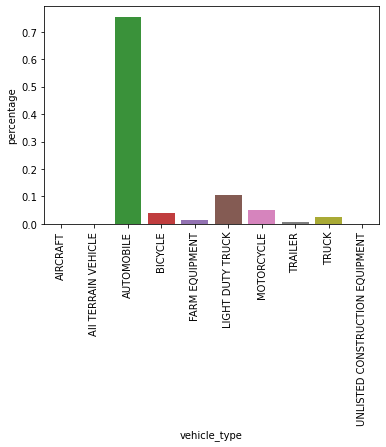

In [170]:
ax = sns.barplot(data = df_sum_vehtype, x = 'vehicle_type', y = 'percentage')
ax.tick_params(axis='x', rotation=90)

In [171]:
#now for vehicle make 

n_vehmake = traffic_collisions_details_edited.groupby('veh_make')['report_id'].count()
n_vehmake

veh_make
1UP                     1
6000                    1
6KU                     2
A & M BOAT TRAILER      1
A1 CYCLES               1
                       ..
ZHONGNENG MOTORCYCLE    1
ZIEMAN                  8
ZIPPER                  1
ZONGSHEN MTRCYCLE CO    1
_                       1
Name: report_id, Length: 700, dtype: int64

In [173]:
n_vehmake_df = pd.DataFrame({'make':n_vehmake.index,'counts':n_vehmake.values})
n_vehmake_df

,make,counts
0,1UP,1
1,6000,1
2,6KU,2
3,A & M BOAT TRAILER,1
4,A1 CYCLES,1
...,...,...
695,ZHONGNENG MOTORCYCLE,1
696,ZIEMAN,8
697,ZIPPER,1
698,ZONGSHEN MTRCYCLE CO,1


In [174]:
#sort by descending 

n_vehmake_df = n_vehmake_df.sort_values(by='counts', ascending=False)
n_vehmake_df

,make,counts
619,TOYOTA,18821
208,FORD,12715
272,HONDA,12633
429,NISSAN,8567
117,CHEVROLET,6779
...,...,...
280,HYPER BICYCLES,1
279,HYPER,1
278,HYOSUNG MOTORS & MACHINERY SOUTH KOREA,1
275,HUFFY CORP.,1


In [177]:
n_vehmake_df['percentage'] = n_vehmake_df.counts/n_vehmake_df.counts.sum()
n_vehmake_df

,make,counts,percentage
619,TOYOTA,18821,0.177041
208,FORD,12715,0.119604
272,HONDA,12633,0.118833
429,NISSAN,8567,0.080586
117,CHEVROLET,6779,0.063767
...,...,...,...
280,HYPER BICYCLES,1,0.000009
279,HYPER,1,0.000009
278,HYOSUNG MOTORS & MACHINERY SOUTH KOREA,1,0.000009
275,HUFFY CORP.,1,0.000009


In [178]:
#subset get top 10

top_10makes = n_vehmake_df.head(10)
top_10makes

,make,counts,percentage
619,TOYOTA,18821,0.177041
208,FORD,12715,0.119604
272,HONDA,12633,0.118833
429,NISSAN,8567,0.080586
117,CHEVROLET,6779,0.063767
285,HYUNDAI,3687,0.034682
160,DODGE,3410,0.032076
46,B.M.W.,3244,0.030515
662,VOLKSWAGEN,2851,0.026818
316,JEEP,2675,0.025162


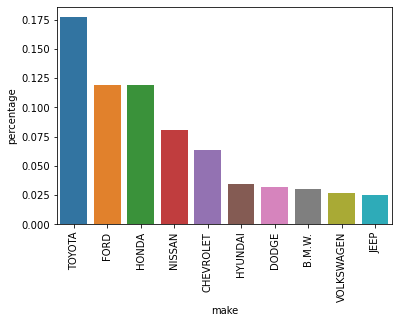

In [179]:
ax = sns.barplot(data = top_10makes, x = 'make', y = 'percentage')
ax.tick_params(axis='x', rotation=90)

In [180]:
#vehicle model 

n_vehmodel = traffic_collisions_details_edited.groupby('veh_model')['report_id'].count()
n_vehmodel

veh_model
100           1
1000          1
1200          2
122 SERIES    2
128I          1
             ..
crosstrek     3
elantra       1
f150          1
fiesta        3
spark         1
Name: report_id, Length: 1017, dtype: int64

In [181]:
n_vehmodel = pd.DataFrame({'model':n_vehmodel.index,'counts':n_vehmodel.values})
n_vehmodel

,model,counts
0,100,1
1,1000,1
2,1200,2
3,122 SERIES,2
4,128I,1
...,...,...
1012,crosstrek,3
1013,elantra,1
1014,f150,1
1015,fiesta,3


In [182]:
#sort by descending 

n_vehmodel = n_vehmodel.sort_values(by='counts', ascending=False)
n_vehmodel

,model,counts
199,CAMRY,3641
121,ACCORD,3449
271,COROLLA,3370
685,PRIUS,2577
232,CIVIC (AND CRX),2576
...,...,...
536,KLX300,1
529,JETT,1
526,Impreza,1
525,Impala,1


In [183]:
n_vehmodel['percentage'] = n_vehmodel.counts/n_vehmodel.counts.sum()
n_vehmodel

,model,counts,percentage
199,CAMRY,3641,0.044161
121,ACCORD,3449,0.041832
271,COROLLA,3370,0.040874
685,PRIUS,2577,0.031256
232,CIVIC (AND CRX),2576,0.031244
...,...,...,...
536,KLX300,1,0.000012
529,JETT,1,0.000012
526,Impreza,1,0.000012
525,Impala,1,0.000012


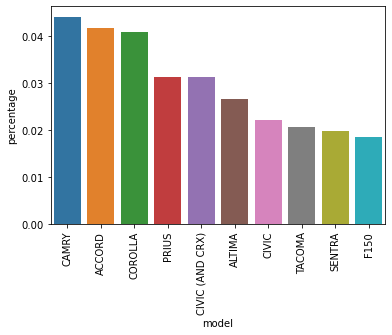

In [185]:
top_10models = n_vehmodel.head(10)
ax = sns.barplot(data = top_10models, x = 'model', y = 'percentage')
ax.tick_params(axis='x', rotation=90)

Now lets see which police beat is most prominent- police beat can tell us about general location

In [186]:
#police beat 

n_beat = traffic_collisions_details_edited.groupby('police_beat')['report_id'].count()
n_beat

police_beat
3        2
20       2
21       6
24       1
26       1
      ... 
934    449
935    118
936     68
937    102
999     57
Name: report_id, Length: 284, dtype: int64

In [187]:
n_beat = pd.DataFrame({'beat':n_beat.index,'counts':n_beat.values})
n_beat

,beat,counts
0,3,2
1,20,2
2,21,6
3,24,1
4,26,1
...,...,...
279,934,449
280,935,118
281,936,68
282,937,102


In [188]:
n_beat = n_beat.sort_values(by='counts', ascending=False)
n_beat

,beat,counts
14,122,4544
25,242,2616
112,813,2556
31,313,2381
71,521,2155
...,...,...
44,419,1
144,003,1
63,505,1
82,600,1


In [189]:
n_beat['percentage'] = n_beat.counts/n_beat.counts.sum()
n_beat

,beat,counts,percentage
14,122,4544,0.038409
25,242,2616,0.022112
112,813,2556,0.021605
31,313,2381,0.020126
71,521,2155,0.018215
...,...,...,...
44,419,1,0.000008
144,003,1,0.000008
63,505,1,0.000008
82,600,1,0.000008


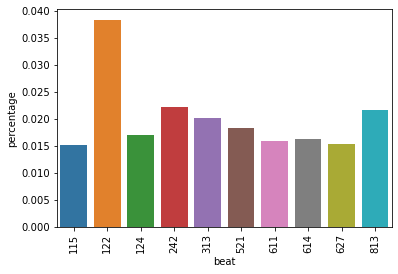

In [190]:
top_10beats = n_beat.head(10)
ax = sns.barplot(data = top_10beats, x = 'beat', y = 'percentage')
ax.tick_params(axis='x', rotation=90)

So it seems that there isnt a really prominent police beat present